
<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/umbcdata602/spring2021/blob/master/adaline.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg"  style="padding-bottom:5px;" /></a></td>
</table>


[![hello](https://raw.githubusercontent.com/umbcdata602/spring2021/master/colab-badge.svg)](https://colab.research.google.com/github/umbcdata602/spring2021/blob/master/adaline.ipynb)

<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/umbcdata602/spring2021/blob/master/adaline.ipynb">
<img src="https://github.com/umbcdata602/spring2021/raw/master/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>


# Adaline

### References

* [Python Machine Learning, 3rd Edition](https://github.com/rasbt/python-machine-learning-book-3rd-edition) (2019) by Rashka & Mirjalili -- github
    * [ch02.ipynb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch02/ch02.ipynb) -- github

In [ ]:
import numpy as np

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# Cost function
Sum of squared errors (SSE):
$$
J(w) = \frac{1}{2} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right)^2
$$
where
$$
z = w_0 + \sum_{i=1}^p w_i x_i = \mathbf{w}^T \mathbf{x}
$$
For Adaline, $\phi (z) = z$, so $J(w)$ is a quadratic function of $w$ (upward facing parabola) in one dimension.

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch02/images/02_12.png" width="600"/>


In two dimensions, the cost function is an upward facing bowl with a global minimum. For any combination of $w$, the direction of maximum increase in $J(w)$ occurs in the direction of the gradient $\nabla J$.
$$
J(w+\Delta w) = J(w) + \nabla J \cdot dw
$$
The components of $\nabla J$ are $\frac{J}{dw_j}$, and $dw$ is parallel to $\nabla J$.


Likewise, the most rapid decrease in $J$ occurs in the direction of $ - \nabla J$. So if we want to find the $w$ that minimizes $J$, then we make updates to $w$ in the direction of $-\nabla J$, that is, down the gradient, hence the term gradient descent.
If there are $n$ features, then there are $n+1$ weights $w_j$ and component $j$ of $\nabla J$ is:

$$
\frac{dJ}{dw_j} = \frac{dJ}{dz} \frac{dz}{dw_j} = 
- \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right) x_j^{(i)}
$$

Although we don't know the minimum value of $J$, we can compute $J(w)$ and $\nabla J$ as a function of $w$. And when $J$ is convex (as is the case for Adaline), we know that $\nabla J$ decreases to zero at the minimum (i.e., the bottom of the bowl is flat). Therefore, we may want to increase the learning rate $\eta$ as we get closer to the minimum.



In [ ]:
# Load the Iris data directly from the UC Irvine archive
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


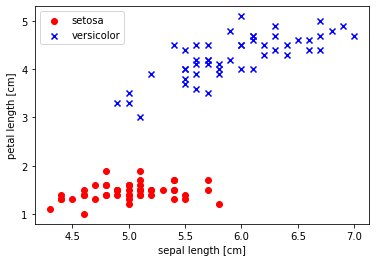

In [ ]:
# Plot a subset of the data (2 features for 2 classes)
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left');

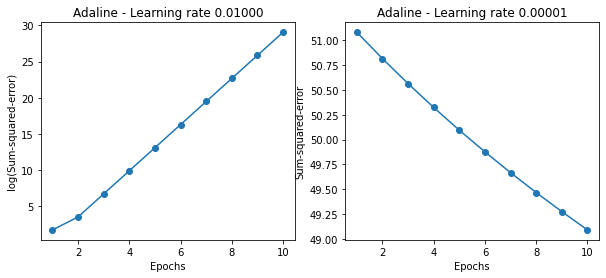

In [ ]:
# Train the model
eta1 = .01
ada1 = AdalineGD(n_iter=10, eta=eta1).fit(X, y)

# Plot the learning curves
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate {:.5f}'.format(eta1))

eta2 = .00001
ada2 = AdalineGD(n_iter=10, eta=eta2).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate {:.5f}'.format(eta2))
plt.show()

In [ ]:
# Convenience function for plotting the decision region
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

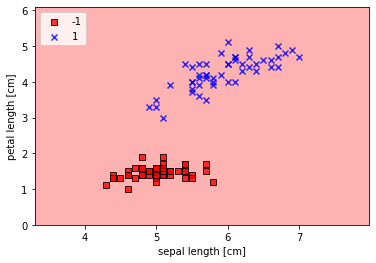

In [ ]:
# Plot the decision region
plot_decision_regions(X, y, classifier=ada2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left');

# Feature scaling

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch02/images/02_13.png" width="600"/>

In [ ]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

# Exercise

Use the scaled variables

# Exercise

Solve the 1-D problem with setosa and versicolor